Installation in Python - PyPI release

In [1]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

# from fbprophet import Prophet
from prophet import Prophet

import matplotlib.pyplot as plt
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

Matplotlib must be manually registered with Pandas due to a conflict between Prophet and Pandas.

In [3]:
pd.plotting.register_matplotlib_converters()

In [4]:
df=pd.read_csv('updated_retails_data.csv')

In [5]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu
1,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu
2,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu
3,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu
4,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,2015-06-09,West,2305,0.26,322.70,Tamil Nadu


In [6]:
# dir(Prophet)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9993 non-null   object 
 1   Customer Name  9993 non-null   object 
 2   Category       9993 non-null   object 
 3   Sub Category   9993 non-null   object 
 4   City           9993 non-null   object 
 5   Order Date     9993 non-null   object 
 6   Region         9993 non-null   object 
 7   Sales          9993 non-null   int64  
 8   Discount       9993 non-null   float64
 9   Profit         9993 non-null   float64
 10  State          9993 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 858.9+ KB


In [7]:

monthly_df = df.copy()
monthly_df['Date'] = monthly_df['Order Date'].apply(lambda x: str(x)[:-3])
monthly_df = monthly_df.groupby('Date')['Sales'].sum().reset_index()
monthly_df['Date'] = pd.to_datetime(monthly_df['Date'])

In [8]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    48 non-null     datetime64[ns]
 1   Sales   48 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 896.0 bytes


In [9]:
monthly_df.head()

,Date,Sales
0,2015-01-01,122497
1,2015-02-01,66030
2,2015-03-01,247156
3,2015-04-01,203258
4,2015-05-01,164263


In [10]:
monthly_df.tail()

,Date,Sales
43,2018-08-01,331014
44,2018-09-01,705680
45,2018-10-01,443898
46,2018-11-01,683410
47,2018-12-01,687245


In [11]:
# x=monthly_df['Date']
# y=monthly_df['Sales']
# plt.figure(figsize=(12, 6))
# plt.plot(x,y)
# plt.title("Monthly Sales")

# monthly_df.set_index('ds').y.plot().figure

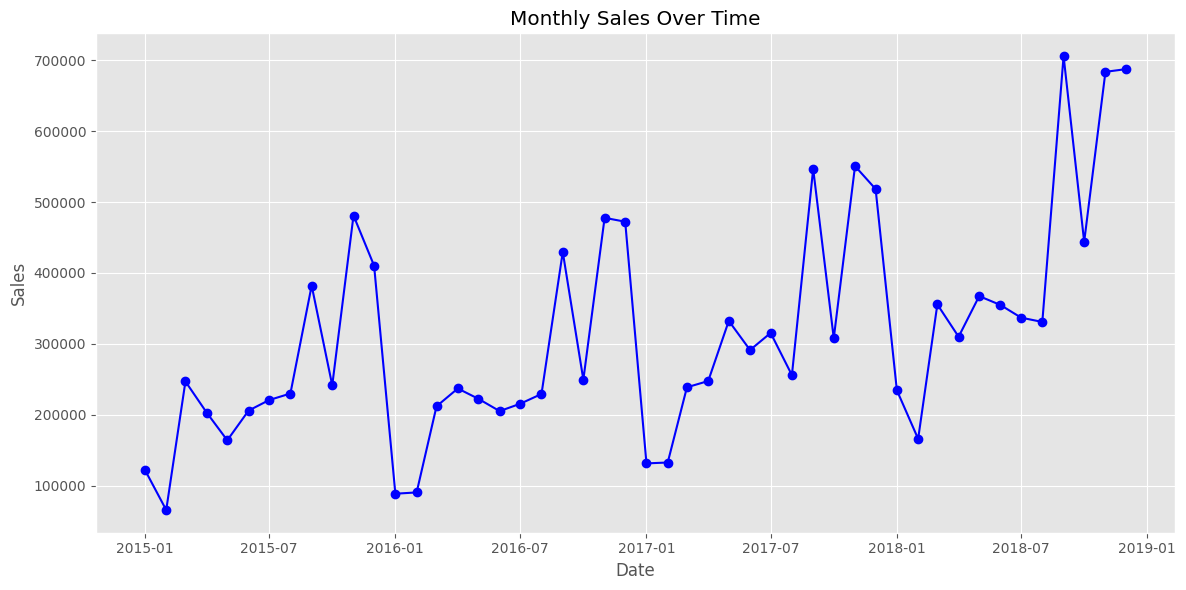

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the data in a DataFrame named 'monthly_df'
# Make sure the 'Order Date' column is of datetime type
# Replace 'monthly_df' with the actual name of your DataFrame
def graph_plot(data):
    # Set the 'Date' column as the index for easier plotting
    graph_data = data.copy()
    graph_data.set_index('Date', inplace=True)

    # Create a line plot to visualize sales over time
    plt.figure(figsize=(12, 6))
    plt.plot(graph_data.index, graph_data['Sales'], marker='o', linestyle='-', color='b')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title('Monthly Sales Over Time')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

graph_plot(monthly_df)

In [13]:
# we need to rename date columns into "ds" and sales columns/output featurs into "y" for our Facebook’s Prophet model.
monthly_df.columns = ['ds','y']

In [14]:
monthly_df.head()

,ds,y
0,2015-01-01,122497
1,2015-02-01,66030
2,2015-03-01,247156
3,2015-04-01,203258
4,2015-05-01,164263


In [15]:
# dir(Prophet)

In [16]:
# Initialize the Model
model=Prophet()

In [17]:
monthly_df.columns

Index(['ds', 'y'], dtype='object')

In [18]:
monthly_df.dropna(axis=0,inplace=True)

In [19]:
monthly_df.head()

,ds,y
0,2015-01-01,122497
1,2015-02-01,66030
2,2015-03-01,247156
3,2015-04-01,203258
4,2015-05-01,164263


In [20]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
# model = Prophet(interval_width=0.95)
model.fit(monthly_df)

01:56:59 - cmdstanpy - INFO - Chain [1] start processing
01:56:59 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [22]:
monthly_df.tail()

,ds,y
43,2018-08-01,331014
44,2018-09-01,705680
45,2018-10-01,443898
46,2018-11-01,683410
47,2018-12-01,687245


In [85]:
### Create future dates of 365 days
# future_dates=model.make_future_dataframe(periods=365)

# Below code is for month end 
# future_dates = model.make_future_dataframe(periods=24, freq = 'm')

# Below code is for month start.
future_dates = model.make_future_dataframe(periods=12, freq = 'MS')

In [86]:
future_dates.head(50)

,ds
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
5,2015-06-01
6,2015-07-01
7,2015-08-01
8,2015-09-01
9,2015-10-01


In [87]:
future_dates.tail()

,ds
55,2019-08-01
56,2019-09-01
57,2019-10-01
58,2019-11-01
59,2019-12-01


In [88]:
prediction=model.predict(future_dates)

In [89]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,233410.011120,57969.359731,123603.897265,233410.011120,233410.011120,-142656.163894,-142656.163894,-142656.163894,-142656.163894,-142656.163894,-142656.163894,0.0,0.0,0.0,90753.847226
1,2015-02-01,235039.779080,26784.117271,94014.089759,235039.779080,235039.779080,-175368.693004,-175368.693004,-175368.693004,-175368.693004,-175368.693004,-175368.693004,0.0,0.0,0.0,59671.086076
2,2015-03-01,236511.827572,198238.958842,267305.302122,236511.827572,236511.827572,-1753.736001,-1753.736001,-1753.736001,-1753.736001,-1753.736001,-1753.736001,0.0,0.0,0.0,234758.091572
3,2015-04-01,238141.595546,150763.300114,216085.159746,238141.595546,238141.595546,-56282.705959,-56282.705959,-56282.705959,-56282.705959,-56282.705959,-56282.705959,0.0,0.0,0.0,181858.889586
4,2015-05-01,239718.790342,154376.586122,217611.277112,239718.790342,239718.790342,-52268.872925,-52268.872925,-52268.872925,-52268.872925,-52268.872925,-52268.872925,0.0,0.0,0.0,187449.917417


In [90]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
55,2019-08-01,518527.968752,435133.546431,502560.256012,514293.432796,522507.358778,-47618.065050,-47618.065050,-47618.065050,-47618.065050,-47618.065050,-47618.065050,0.0,0.0,0.0,470909.903702
56,2019-09-01,526785.366282,682477.802251,747163.512995,521636.868389,531708.819960,189949.679164,189949.679164,189949.679164,189949.679164,189949.679164,189949.679164,0.0,0.0,0.0,716735.045446
57,2019-10-01,534776.396151,494818.368505,559855.741443,528763.581885,540557.890121,-8424.984443,-8424.984443,-8424.984443,-8424.984443,-8424.984443,-8424.984443,0.0,0.0,0.0,526351.411708
58,2019-11-01,543033.793682,737539.177142,807473.968777,536022.142274,549911.093780,228249.143690,228249.143690,228249.143690,228249.143690,228249.143690,228249.143690,0.0,0.0,0.0,771282.937372
59,2019-12-01,551024.823550,689267.349706,758965.900765,543053.307794,558907.672073,174224.639932,174224.639932,174224.639932,174224.639932,174224.639932,174224.639932,0.0,0.0,0.0,725249.463482


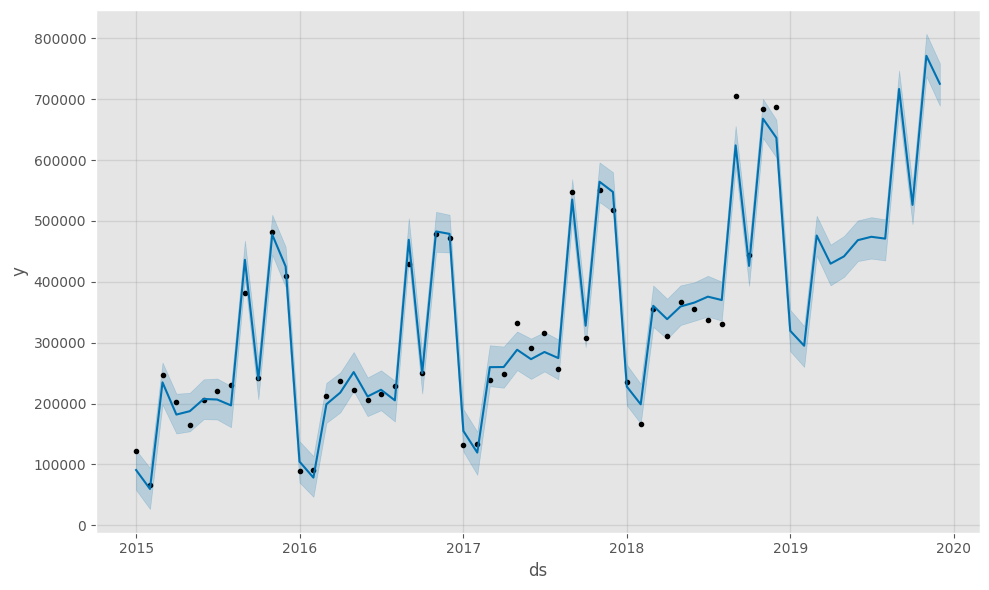

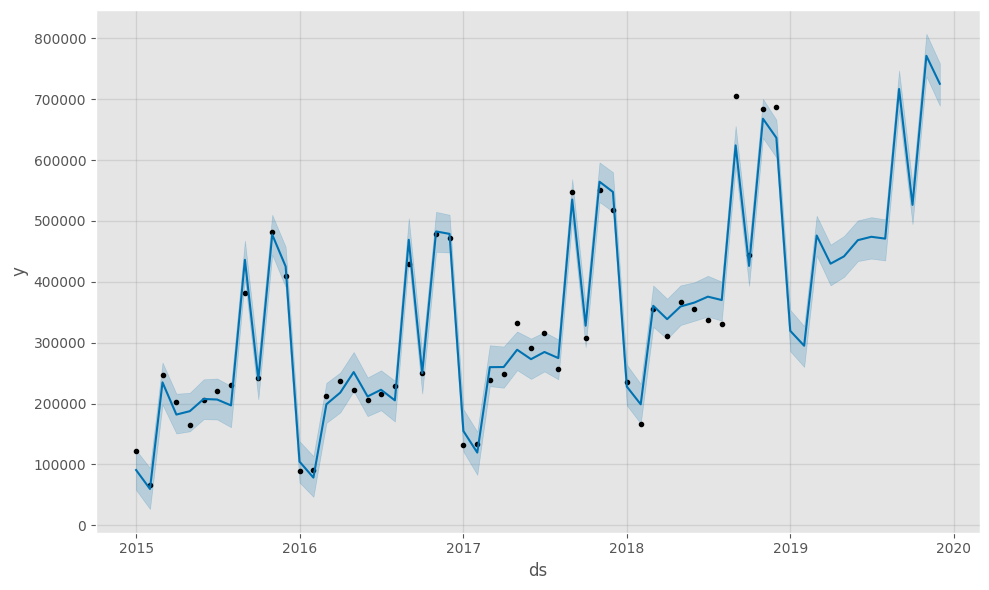

In [91]:
### plot the predicted projection
model.plot(prediction)

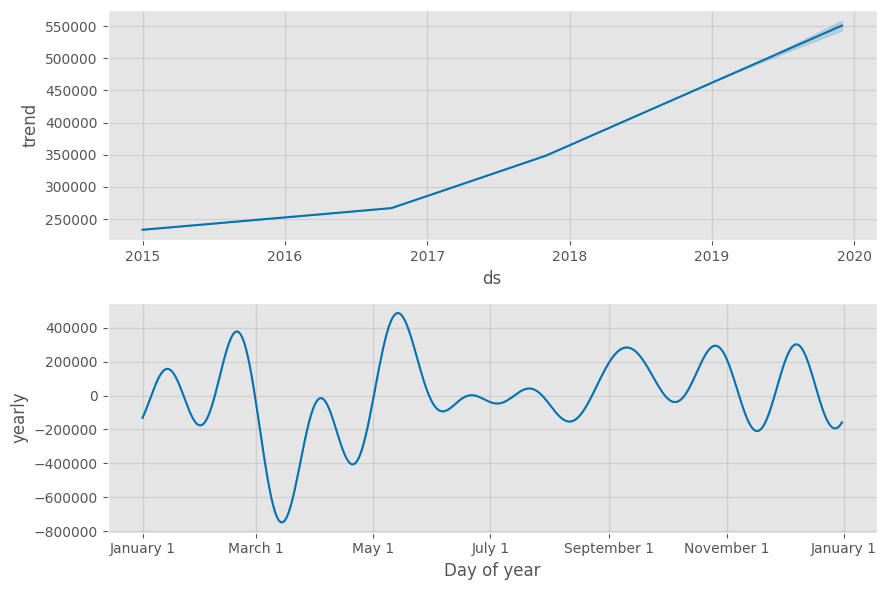

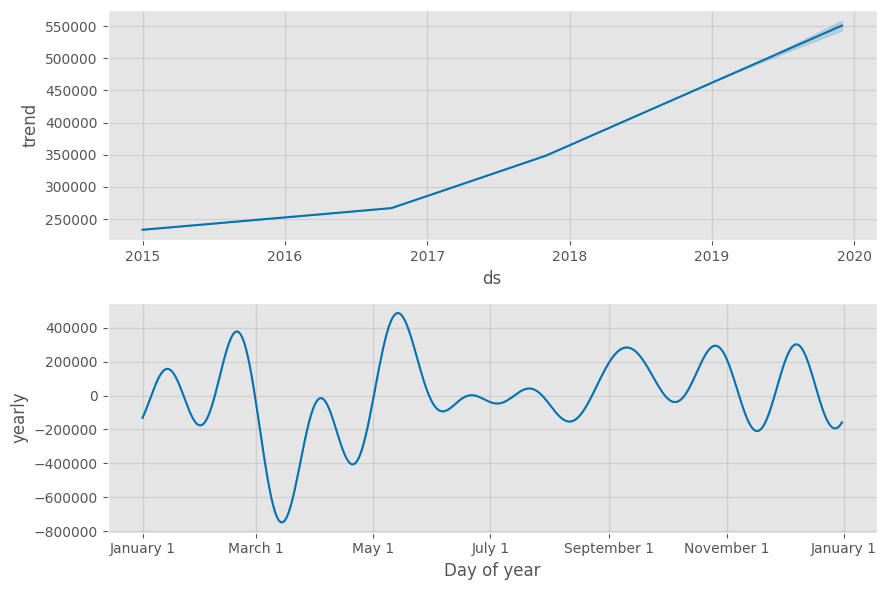

In [92]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [93]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|          | 0/2 [00:00<?, ?it/s]

03:18:58 - cmdstanpy - INFO - Chain [1] start processing
03:18:58 - cmdstanpy - INFO - Chain [1] done processing
03:18:58 - cmdstanpy - INFO - Chain [1] start processing
03:18:58 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-07-01,274533.898267,256182.144481,294651.800459,315531,2017-06-04
1,2017-08-01,288586.838080,269614.156652,308470.047628,256089,2017-06-04
2,2017-09-01,474188.853326,455648.132579,494233.894776,546728,2017-06-04
3,2017-10-01,308382.808831,288532.733714,328286.241247,308026,2017-06-04
4,2017-11-01,541841.547602,521397.423077,561134.273630,550561,2017-06-04


In [94]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
19,2018-08-01,349924.922828,326583.516981,371780.511547,331014,2017-12-01
20,2018-09-01,549850.935922,526078.102898,572731.958051,705680,2017-12-01
21,2018-10-01,376711.316942,354499.122726,400623.899279,443898,2017-12-01
22,2018-11-01,617507.602867,594030.565534,640037.169892,683410,2017-12-01
23,2018-12-01,569152.387873,545316.243044,592216.995964,687245,2017-12-01


In [95]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,31 days,1.297534e+09,36021.298647,35617.293886,0.129372,0.129372,0.138319,0.0
1,58 days,9.852075e+08,31388.015562,31367.662060,0.127857,0.127857,0.128505,0.0
2,62 days,8.230361e+08,28688.604960,28393.492203,0.136493,0.136493,0.127735,0.0
3,89 days,2.925945e+09,54092.006940,48414.146500,0.139382,0.139382,0.139123,0.0
4,90 days,2.762391e+09,52558.456613,44375.973939,0.089129,0.089129,0.094374,0.5


In [96]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
18,304 days,2.262767e+09,47568.552149,35287.738668,0.081141,0.081141,0.087308,0.5
19,331 days,3.616085e+09,60133.888640,59661.131738,0.146628,0.146628,0.158242,0.0
20,335 days,3.530622e+09,59419.040271,59018.988775,0.119166,0.119166,0.127027,0.0
21,362 days,2.571680e+09,50711.739084,47095.411288,0.088070,0.088070,0.092167,0.0
22,365 days,7.373050e+09,85866.466252,73190.518785,0.125771,0.125771,0.135501,0.0


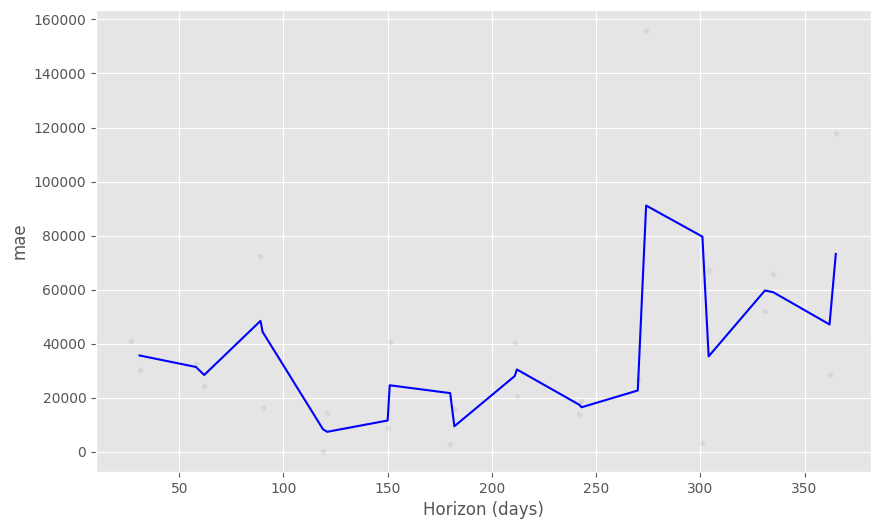

In [97]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

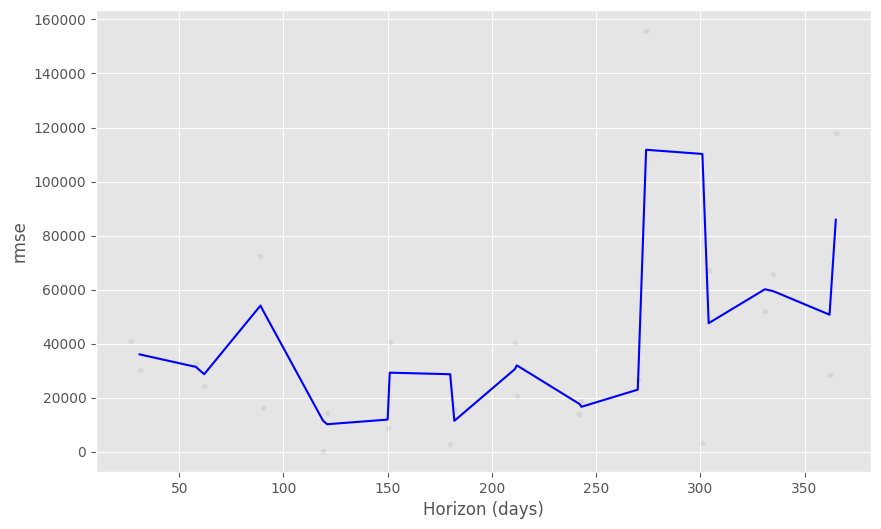

In [98]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')


In [101]:
from sklearn.metrics import r2_score
original=monthly_df[['y']]
# prediction=prediction[['yhat']].head(48)
prediction=prediction[['yhat']]
r2_score(original,prediction)
print("Accuracy of the model is :",100*r2_score(original,prediction))

Accuracy of the model is : 97.20155767649068


In [37]:
def sales_duration(data):
    data['Order Date'] = pd.to_datetime(data['Order Date'])  # Convert 'Order Date' column to datetime
    number_of_days = data['Order Date'].max() - data['Order Date'].min()
    number_of_years = number_of_days.days / 365
    print(number_of_days.days, 'days')
    print(number_of_years, 'years')

sales_duration(df)

1457 days
3.9917808219178084 years


In [38]:
# import matplotlib.pyplot as plt
# def sales_per_day():
#     fig, ax = plt.subplots(figsize=(7, 4))
#     ax.hist(df['Sales'], color='mediumblue')  # Replace 'sales_data' with your DataFrame variable name
    
#     ax.set(xlabel="Sales Per day",
#            ylabel="Count",
#            title="Distribution of Sales Per Day")

# sales_per_day()

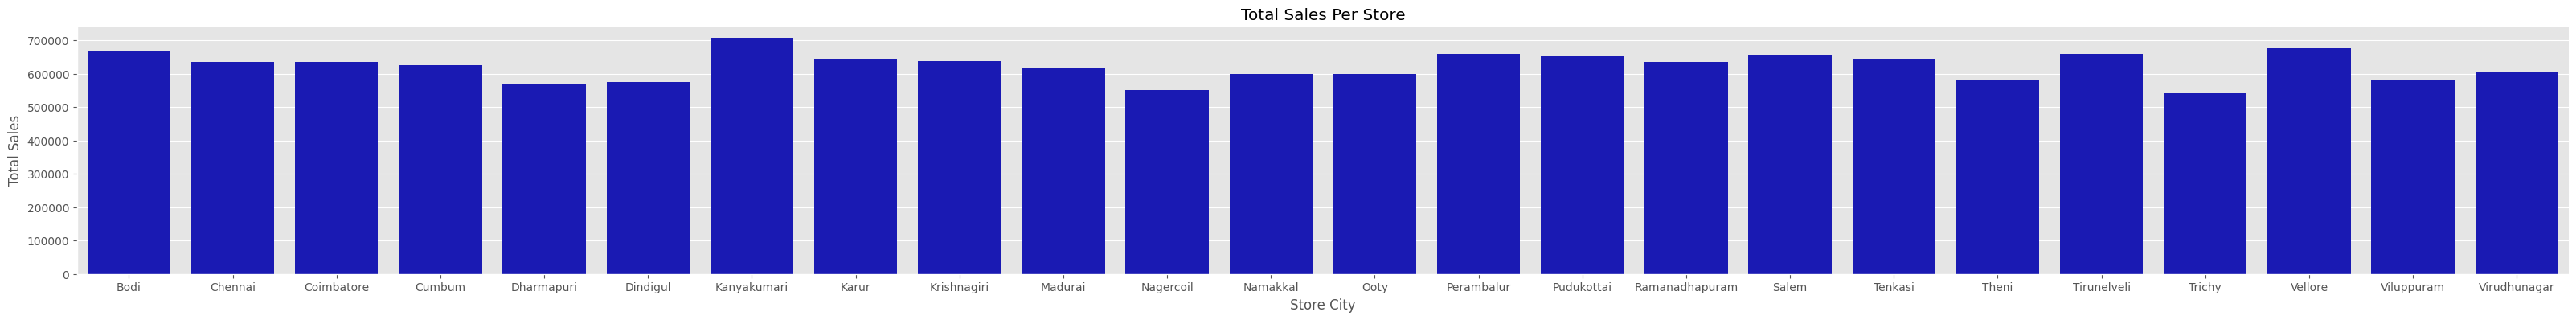

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded the DataFrame and it is named 'df'
# If not, load your DataFrame here using pandas.read_csv() or any other method

def sales_per_store():
    by_store = df.groupby('City')['Sales'].sum().reset_index()
    
    fig, ax = plt.subplots(figsize=(40, 4))
    sns.barplot(x='City', y='Sales', data=by_store, color='mediumblue')
    
    ax.set(xlabel="Store City",
           ylabel="Total Sales",
           title="Total Sales Per Store")
    
    sns.despine()

sales_per_store()
plt.show()
